In [35]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [69]:
from sklearn import datasets
boston = datasets.load_boston()
x = boston.data
y = boston.target

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
std=StandardScaler()
std.fit(x_train)
x_train=std.transform(x_train)
x_test=std.transform(x_test)

In [73]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


# SGDRegressor

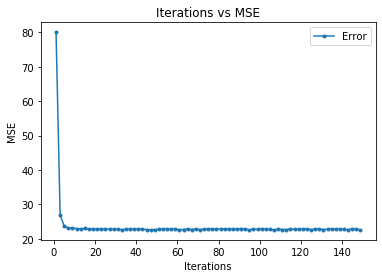

In [74]:
Intercept=[]
MSE=[]

from sklearn.linear_model import SGDRegressor

iterations=[i for i in range(1,150,2)]

for i in iterations:
    
    sgdr=SGDRegressor(max_iter=i,eta0=0.01)
    sgdr.fit(x_train, y_train)
    sgdPred=sgdr.predict(x_test)
    
    
    ints=sgdr.intercept_
    Intercept.append(ints)
    
    mse=mean_squared_error(y_test,sgdPred)
    MSE.append(mse)
    
    
plt.plot(iterations, MSE, label='Error',marker = '.') 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()



------------For iteration =  1 -------------

---Intercept--- 
 [15.12008983]

---MSE--- 
 77.45681956899091

---Weights---
 [-0.62485407  0.3205335  -0.66203106  0.98613777 -0.27960149  2.90872164
 -0.30290371 -1.03630233  0.24195278 -0.43824559 -1.4247331   1.0318855
 -2.40412777]


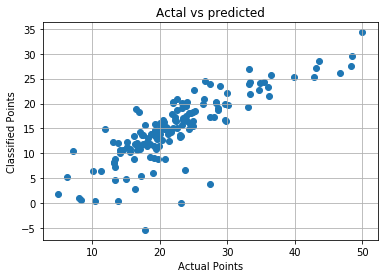



------------For iteration =  50 -------------

---Intercept--- 
 [22.52457907]

---MSE--- 
 22.88869352462794

---Weights---
 [-0.97750328  1.06419243 -0.06740049  0.90428616 -2.0200159   2.72612342
  0.35807906 -3.10700075  1.56745747 -0.68494214 -2.26556395  1.18830386
 -4.08784565]


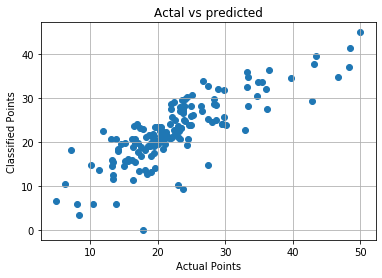



------------For iteration =  100 -------------

---Intercept--- 
 [22.52372944]

---MSE--- 
 22.79524529362067

---Weights---
 [-0.98846083  1.13774758  0.03477445  0.84677419 -2.09302089  2.68872331
  0.37596779 -3.20808829  1.80993595 -0.92377817 -2.28314049  1.17318107
 -4.08865419]


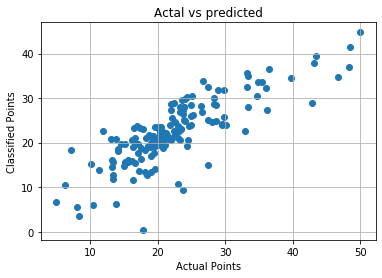



------------For iteration =  200 -------------

---Intercept--- 
 [22.54672901]

---MSE--- 
 22.857474922596783

---Weights---
 [-0.94833497  1.0850119  -0.0695824   0.89634344 -1.99181315  2.75657336
  0.33264097 -3.14241182  1.62706701 -0.69596225 -2.23029011  1.1866963
 -4.07939398]


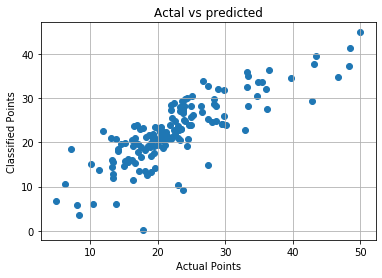



------------For iteration =  500 -------------

---Intercept--- 
 [22.52803537]

---MSE--- 
 22.917613352459306

---Weights---
 [-0.98717318  1.14883855  0.05038635  0.87583426 -2.11745339  2.66483025
  0.40015073 -3.2230427   1.8311742  -0.9067151  -2.2864224   1.17452199
 -4.1170727 ]


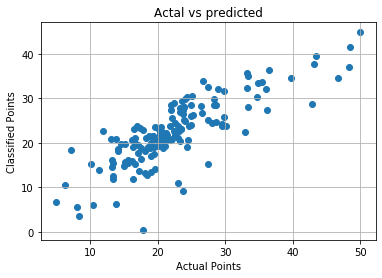



------------For iteration =  1000 -------------

---Intercept--- 
 [22.53575466]

---MSE--- 
 22.7867340330588

---Weights---
 [-0.96828996  1.12682036  0.01405149  0.87597617 -2.05014408  2.71972696
  0.36121477 -3.17633317  1.771539   -0.86936596 -2.26838781  1.15662124
 -4.07877517]


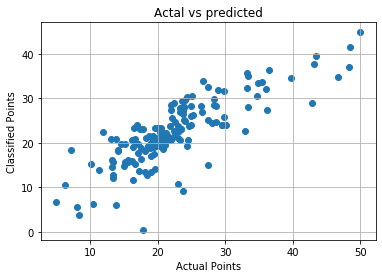

In [75]:
iteration=[1,50,100,200,500,1000]
for i in iteration:
    
    
    sgdr1=SGDRegressor(max_iter=i,eta0=0.01)
    sgdr1.fit(x_train, y_train)
    sgdPredi=sgdr1.predict(x_test)
    
    
    print("\n\n------------For iteration = ",i,"-------------")
    print("\n---Intercept--- \n",sgdr1.intercept_)
    print("\n---MSE--- \n",mean_squared_error(y_test,sgdPredi))
    print("\n---Weights---\n",sgdr1.coef_ )
    
    
    plt.title("Actal vs predicted")
    plt.scatter(y_test, sgdPredi)
    plt.ylabel('Classified Points')
    plt.xlabel('Actual Points')
    plt.grid()
    plt.show()

In [76]:
sgdr12=SGDRegressor(max_iter=1000,eta0=0.01)
sgdr12.fit(x_train, y_train)
sgdPredi=sgdr12.predict(x_test)
print("\n---Weights---\n",sgdr12.coef_ )


---Weights---
 [-0.97019806  1.09484476 -0.06203653  0.895622   -1.9747849   2.78124441
  0.31475029 -3.09586961  1.59234025 -0.7333132  -2.26108306  1.18314297
 -4.07344965]


# Manual SGD             

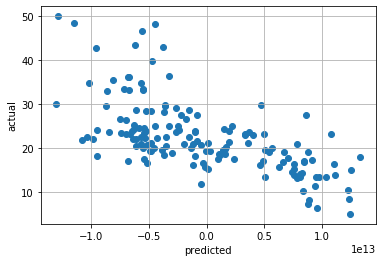

<---------------For iteration =  1 ------------------>
------MSE-------
 4.202019183310846e+25 

------Weights-----

 [[ 7.07135482e+11]
 [-7.01597497e+11]
 [ 9.50284608e+11]
 [ 7.00629356e+10]
 [ 9.46791595e+11]
 [-5.07333885e+11]
 [ 8.50301277e+11]
 [-8.90213704e+11]
 [ 8.59101675e+11]
 [ 9.13052239e+11]
 [ 5.27017282e+11]
 [-5.31948840e+11]
 [ 8.21585168e+11]]
<-------------------------------------------------------->


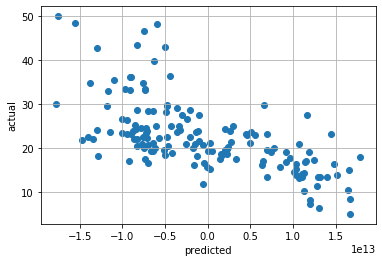

<---------------For iteration =  50 ------------------>
------MSE-------
 7.67726810640478e+25 

------Weights-----

 [[ 8.84033236e+11]
 [-9.72601468e+11]
 [ 1.28121433e+12]
 [ 7.32911731e+10]
 [ 1.27381810e+12]
 [-6.56728020e+11]
 [ 1.14680905e+12]
 [-1.23488869e+12]
 [ 1.18738339e+12]
 [ 1.23639542e+12]
 [ 7.39871870e+11]
 [-6.88431708e+11]
 [ 1.11462445e+12]]
<-------------------------------------------------------->


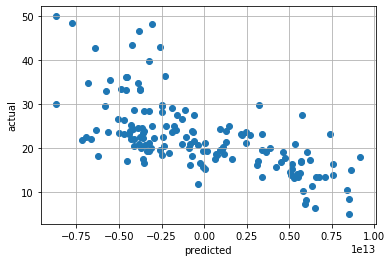

<---------------For iteration =  100 ------------------>
------MSE-------
 1.9262502115210984e+25 

------Weights-----

 [[ 5.01470656e+11]
 [-4.63262614e+11]
 [ 6.40391121e+11]
 [ 3.52690380e+10]
 [ 6.32106138e+11]
 [-3.40572719e+11]
 [ 5.63626476e+11]
 [-5.74476166e+11]
 [ 5.84231128e+11]
 [ 6.27505007e+11]
 [ 3.63585140e+11]
 [-3.89026152e+11]
 [ 5.67267878e+11]]
<-------------------------------------------------------->


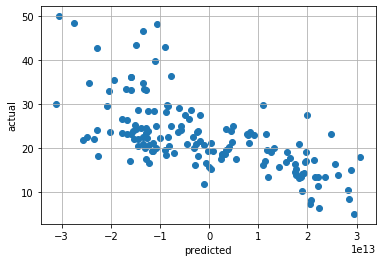

<---------------For iteration =  200 ------------------>
------MSE-------
 2.3110127854969934e+26 

------Weights-----

 [[ 1.72351579e+12]
 [-1.75535205e+12]
 [ 2.20461583e+12]
 [ 2.25377175e+11]
 [ 2.20140448e+12]
 [-1.20477456e+12]
 [ 2.06111343e+12]
 [-2.09818125e+12]
 [ 1.98238502e+12]
 [ 2.08966166e+12]
 [ 1.26532852e+12]
 [-1.07321196e+12]
 [ 1.96378253e+12]]
<-------------------------------------------------------->


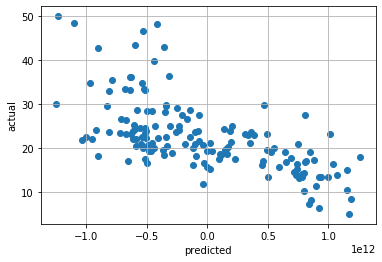

<---------------For iteration =  500 ------------------>
------MSE-------
 3.838725650228006e+23 

------Weights-----

 [[ 5.95369346e+10]
 [-6.73104168e+10]
 [ 9.16563477e+10]
 [ 6.35908477e+09]
 [ 8.96465378e+10]
 [-4.26972428e+10]
 [ 8.35880049e+10]
 [-8.50756388e+10]
 [ 8.23022774e+10]
 [ 8.84179236e+10]
 [ 5.55798473e+10]
 [-5.03289114e+10]
 [ 8.05476602e+10]]
<-------------------------------------------------------->


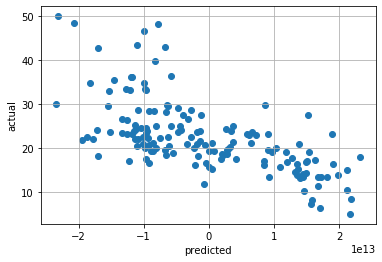

<---------------For iteration =  1000 ------------------>
------MSE-------
 1.325493211099421e+26 

------Weights-----

 [[ 1.08967482e+12]
 [-1.29980991e+12]
 [ 1.68934811e+12]
 [ 9.46636909e+10]
 [ 1.68243656e+12]
 [-8.49922194e+11]
 [ 1.54571147e+12]
 [-1.60627291e+12]
 [ 1.54297205e+12]
 [ 1.62885423e+12]
 [ 1.01567963e+12]
 [-8.76083376e+11]
 [ 1.46954560e+12]]
<-------------------------------------------------------->


In [77]:
iter=[1,50,100,200,500,1000]
for itr in iter:
    iterations=100
    learningrate=0.5
    power_t=0.25
    Weight=np.random.randn(13,1)
    intercept=np.random.randn(1,1)
    train_MSE=[] 
    for iteration in range(1,iterations):
        N=x_train.shape[0]
        iteration_error=0
        for i in range(N):
            batch=np.random.randint(0,N)
            X_train=x_train[batch,:]
            X_train=X_train.reshape(1,x_train.shape[1])
            Y_train=y_train[batch]
            Y_train=Y_train.reshape(1,1)
            Y_hat=np.dot(X_train,Weight)+intercept           
            ERROR=Y_train-Y_hat
            iteration_error+=ERROR**2                                  
            Weight=Weight-(2/N)*learningrate*(X_train.T.dot(ERROR))              
            intercept=intercept-learningrate*(2/N)*(ERROR)
        mse=iteration_error/N
        train_MSE.append(mse)
        learningrate = learningrate / pow(iteration, power_t)
   
    predicted=[]
    for data in x_test:
        predicted.append(np.dot(data,Weight)+intercept)
    pre=np.array(predicted)
    dataset_size = len(pre)
    TwoDim_dataset = pre.reshape(dataset_size,-1)
    plt.scatter(TwoDim_dataset,y_test)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.grid()
    plt.show()
    print("<---------------For iteration = ",itr,"------------------>")
    print("------MSE-------\n",float(mean_squared_error(y_test,TwoDim_dataset)),"\n")
    print("------Weights-----\n\n",Weight)
    print("<-------------------------------------------------------->")

In [78]:
MsE=np.array(train_MSE)

In [79]:
MsE.shape

(99, 1, 1)

In [80]:
dataset_size = len(MsE)
TwoDim_MSE = MsE.reshape(dataset_size,-1)

In [81]:
TwoDim_MSE.shape

(99, 1)

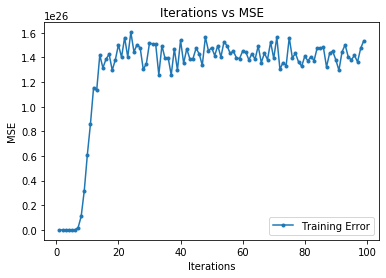

In [82]:
iterations=[i for i in range(1,100,1)]
plt.plot(iterations, TwoDim_MSE, label='Training Error',marker = '.') 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()

In [83]:
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]

ptable = PrettyTable()

ptable.add_column("Sr.NO.",numbering)
ptable.add_column("Weights of Sklearn's SGDregressor",sgdr12.coef_)
ptable.add_column("Weights of Manual SGD",Weight)

print(ptable)

+--------+-----------------------------------+-----------------------+
| Sr.NO. | Weights of Sklearn's SGDregressor | Weights of Manual SGD |
+--------+-----------------------------------+-----------------------+
|   1    |        -0.9701980618512736        |    [1.08967482e+12]   |
|   2    |         1.0948447574270077        |   [-1.29980991e+12]   |
|   3    |        -0.06203653294462808       |    [1.68934811e+12]   |
|   4    |         0.8956220044004903        |    [9.46636909e+10]   |
|   5    |        -1.9747849028487836        |    [1.68243656e+12]   |
|   6    |         2.781244407344778         |   [-8.49922194e+11]   |
|   7    |         0.3147502858782915        |    [1.54571147e+12]   |
|   8    |        -3.0958696105491277        |   [-1.60627291e+12]   |
|   9    |         1.5923402517988814        |    [1.54297205e+12]   |
|   10   |         -0.733313199755413        |    [1.62885423e+12]   |
|   11   |         -2.261083060034974        |    [1.01567963e+12]   |
|   12